 # Week 6:
 File: DSC550_Paulovici_Exercise_6_3.py (.ipynb)<br>
 Name: Kevin Paulovici<br>
 Date: 4/19/2020<br>
 Course: DSC 550 Data Mining (2205-1)<br>
 Assignment: 6.3 Exercise: Original Analysis Case Study Part 1

 ## Assignment Tasks
 Provide a short narrative describing an original idea for an analysis problem. Find or create appropriate data that can be analyzed. <br>
 Write the step-by-step instructions for completing the Graph Analysis part of your case study.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


In [2]:
# Step 1: load the data into a dataframe
file_name = "vgsales.csv" 
data = pd.read_csv(file_name)


In [3]:
# Step 2: check the dimension of the table
print("The dimension of the data is: {}".format(data.shape))


The dimension of the data is: (16598, 11)


In [4]:
# Step 3: Clean up data - only include Year 2014 - present
data = data.loc[data["Year"] > 2013]


In [5]:
# Step 4: check the dimension of the table
print("The dimension of the new data is: {}".format(data.shape))


The dimension of the new data is: (1544, 11)


In [6]:
# Step 5: look at the data
print(data.head(5))


    Rank                                       Name Platform    Year  \
33    34                  Call of Duty: Black Ops 3      PS4  2015.0   
44    45                         Grand Theft Auto V      PS4  2014.0   
49    50  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS  2014.0   
77    78                                    FIFA 16      PS4  2015.0   
92    93               Star Wars Battlefront (2015)      PS4  2015.0   

           Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
33       Shooter            Activision      5.77      5.81      0.35   
44        Action  Take-Two Interactive      3.80      5.81      0.36   
49  Role-Playing              Nintendo      4.23      3.37      3.08   
77        Sports       Electronic Arts      1.11      6.06      0.06   
92       Shooter       Electronic Arts      2.93      3.29      0.22   

    Other_Sales  Global_Sales  
33         2.31         14.24  
44         2.02         11.98  
49         0.65         11.33  
77    

In [7]:
# Step 6: describe data
print("Describe Data\n")
print(data.describe())
print("\nSummarized Data\n")
print(data.describe(include=['O']))


Describe Data

               Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count   1544.000000  1544.000000  1544.000000  1544.000000  1544.000000   
mean    9612.909974  2014.852979     0.166917     0.161995     0.056302   
std     5072.325743     0.776196     0.440443     0.452655     0.212146   
min       34.000000  2014.000000     0.000000     0.000000     0.000000   
25%     5133.000000  2014.000000     0.000000     0.000000     0.000000   
50%    10515.000000  2015.000000     0.020000     0.030000     0.010000   
75%    14190.500000  2015.000000     0.130000     0.130000     0.050000   
max    16592.000000  2020.000000     5.770000     6.060000     3.180000   

       Other_Sales  Global_Sales  
count  1544.000000   1544.000000  
mean      0.050389      0.435725  
std       0.148158      1.039738  
min       0.000000      0.010000  
25%       0.000000      0.030000  
50%       0.010000      0.100000  
75%       0.040000      0.370000  
max       2.310000     14.240

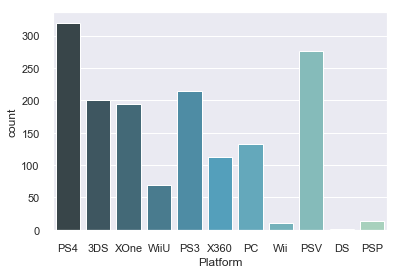

In [8]:
# Step 7: histogram of genre/platform 
sns.set(style="darkgrid")
# platform
sns.countplot(x="Platform", palette="GnBu_d", data=data)


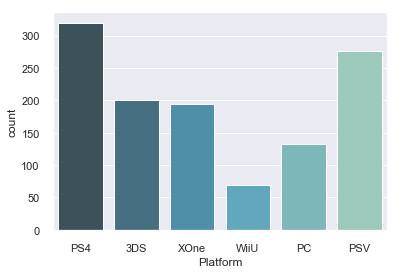

In [9]:
# After reviewing the game counts for the platform, we can elminate some of the poorer performers and the older systems.
data = data.loc[(data["Platform"] == "PS4") | (data["Platform"] == "3DS") | (data["Platform"] == "XOne") | (data["Platform"] == "WiiU") | (data["Platform"] == "PC") | (data["Platform"] == "PSV")]

sns.countplot(x="Platform", palette="GnBu_d", data=data)


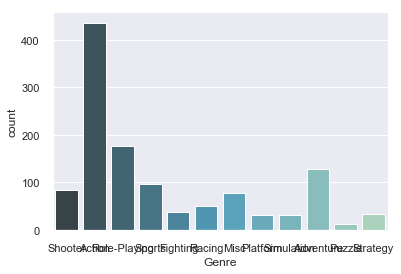

In [10]:
# genre
sns.countplot(x="Genre", palette="GnBu_d", data=data)


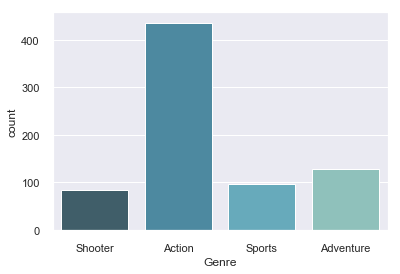

In [11]:
# After reviewing the game counts for the genre, we can elminate some of the poorer performers since we want to reach a wide auidence.
data = data.loc[(data["Genre"] == "Shooter") | (data["Genre"] == "Action") | (data["Genre"] == "Sports") | (data["Genre"] == "Adventure")]

sns.countplot(x="Genre", palette="GnBu_d", data=data)


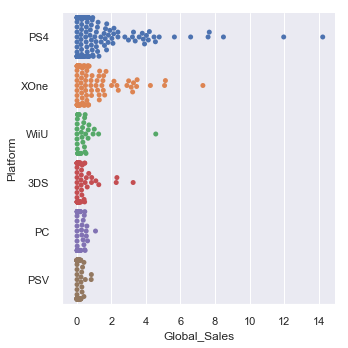

In [12]:
# Step 8: scatter plots of sales vs. genre/platform

# platform
sns.catplot(y="Platform", x="Global_Sales", kind="swarm", data=data)



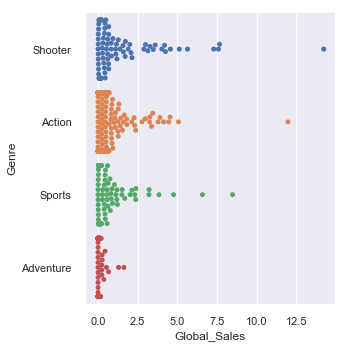

In [13]:
# genre
sns.catplot(y="Genre", x="Global_Sales", kind="swarm", data=data)


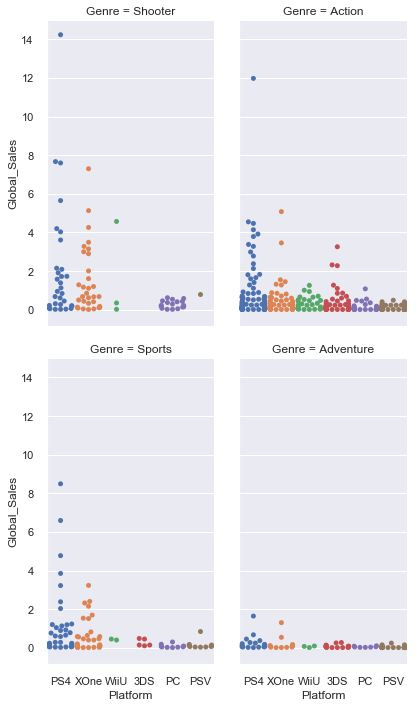

In [14]:
# sns.catplot(x="Genre", y="Global_Sales", col="Platform", aspect=.6, kind="swarm", data=data)

sns.catplot(x="Platform", y="Global_Sales", col="Genre", col_wrap=2, aspect=.6, kind="swarm", data=data)

